In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import gzip
import numpy as np
import os
import phate
import time

import pandas as pd
import pickle as pk

from collections import defaultdict
import itertools

# Interactive HTML tools
from ipywidgets import interact
import bokeh
import bokeh.io
from bokeh.io import push_notebook
from bokeh.plotting import figure, show, save, output_notebook, output_file
from bokeh.palettes import Category20b
from bokeh.palettes import Category20
from bokeh.palettes import Category10
from bokeh.palettes import PRGn
from bokeh.palettes import Set1

# Machine-learning and dimensionality reduction tools
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA as PCA # We'll use this to check our implementation
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import MDS

In [33]:
# Import Jewish genotype data
data_dir = '/Users/alex/Documents/Ethnicity/jewish_genotype/'
data_file = 'khazar_pca.eigenvec'

with open(os.path.join(data_dir, data_file)) as pc:
    pc_read = pc.readlines()

pca_data = []
pc_ids = []
    
for pc in pc_read:
    pca_data.append(pc.strip().split()[2:])
    pc_ids.append(pc.strip().split()[:2])
    
pca_data_array = np.array(pca_data)

In [21]:
# Get a t-SNE projection
khazar_tsne = TSNE(n_components=2).fit_transform(pca_data_array)

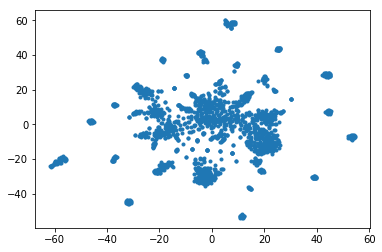

In [23]:
plt.plot(khazar_tsne[:,0],khazar_tsne[:,1],'.')

In [25]:
khazar_tsne_pc = TSNE(n_components=2).fit_transform(pca_data_array[:,:10])

In [154]:
tsne_proj_list = []
pc_list = [5,10,15,20,25,30]
for pc in pc_list:
    tsne_proj_list.append(TSNE(n_components=2).fit_transform(pca_data_array[:,:pc]))
#plt.plot(khazar_tsne_pc[:,0],khazar_tsne_pc[:,1],'.')

# Auxiliary data

* Middle Eastern Jewish: Azerbaijani, Georgian, Iranian, Iraqi, Kurdish, and Uzbekistani (Bukharan)
* Sephardi Jewish: Bulgarian and Turkish
* North African Jewish: Algerian, Libyan, Moroccan, and Tunisian
* Levantine: Bedouin, Cypriot, Druze, Jordanian, Lebanese, Palestinian, Samaritan, and Syrian
* East European non-Jewish: Belarusian, Estonian, Lithuanian, Polish, Romanian, and Ukrainian
* West and South European non-Jewish: French, Italian, and Spanish
* North Caucasus: Adygei, Balkar, Chechen, Kabardin, Kumyk, Lezgin, North Ossetian, and Tabasaran
* South Caucasus: Abkhasian, Armenian, Azeri, and Georgian
* Caucasus: groups 7 and 8 combined
* West Turkic: Azeri, Balkar, Chuvash, Kumyk, Nogai, and Tatar
* East Turkic: Altaian, Kyrgyz, Turkmen, Tuvinian, Uygur, and Uzbek

In [132]:
# Import auxiliary data and get IDs of PCs
aux_data_jewish_df = pd.DataFrame.from_csv(os.path.join(data_dir,'03 Behar Supplemental File 1.csv'),header=0)
pc_ids_df = pd.DataFrame.from_records(pc_ids)
pc_ids_df.columns = ['ID1','ID2']

In [133]:
aux_data_jewish_joined_df = pc_ids_df.merge(aux_data_jewish_df, left_on='ID1', right_index=True, how='left')

In [134]:
aux_data_jewish_joined_df

,ID1,ID2,Population,Group_Population,Region,Jewish /NonJewish,State / Province / City,Country / collected in,Continent,publication,chip,code,color
0,GRC12118082,GRC12118082,Iraqi Jewish,Iraqi Jewish,NaN,Jewish,NaN,Israel,Middle East,Unpublished data,730K,IrqJ,#ED2224
1,GRC12118089,GRC12118089,Uzbekistani Jewish,Uzbekistani Jewish,NaN,Jewish,NaN,Israel,Central Asia,Unpublished data,730K,UzbJ,#ED2224
2,GRC12118095,GRC12118095,Yemenite Jewish,Yemenite Jewish,NaN,Jewish,NaN,Israel,Arabia,Unpublished data,730K,YemJ,#ED2224
3,GRC12118101,GRC12118101,Iranian Jewish,Iranian Jewish,NaN,Jewish,NaN,Israel,Middle East,Unpublished data,730K,IrnJ,#ED2224
4,GRC12118107,GRC12118107,Georgian Jewish,Georgian Jewish,NaN,Jewish,NaN,Israel,Caucasus,Unpublished data,730K,GeoJ,#ED2224
5,GRC12118113,GRC12118113,Ethiopian Jewish,Ethiopian Jewish,NaN,Jewish,NaN,Israel,Africa,Unpublished data,730K,EthJ,#ED2224
6,GRC12118119,GRC12118119,Ethiopian Jewish,Ethiopian Jewish,NaN,Jewish,NaN,Israel,Africa,Unpublished data,730K,EthJ,#ED2224
7,GRC12118125,GRC12118125,Georgian Jewish,Georgian Jewish,NaN,Jewish,NaN,Israel,Caucasus,Unpublished data,730K,GeoJ,#ED2224
8,GRC12118083,GRC12118083,Palestinian,Palestinian,NaN,Non-Jewish,NaN,Israel,Middle East,Unpublished data,730K,Pal,#614A7B
9,GRC12118096,GRC12118096,Cochin Jewish,Cochin Jewish,NaN,Jewish,KERALA,Israel,South Asia,Unpublished data,730K,CocJ,#ED2224


In [135]:
aux_data_jewish_joined_df['Group'] = aux_data_jewish_joined_df['Continent'] + ' ' + aux_data_jewish_joined_df['Jewish /NonJewish']

In [136]:
aux_data_jewish_joined_df

,ID1,ID2,Population,Group_Population,Region,Jewish /NonJewish,State / Province / City,Country / collected in,Continent,publication,chip,code,color,Group
0,GRC12118082,GRC12118082,Iraqi Jewish,Iraqi Jewish,NaN,Jewish,NaN,Israel,Middle East,Unpublished data,730K,IrqJ,#ED2224,Middle East Jewish
1,GRC12118089,GRC12118089,Uzbekistani Jewish,Uzbekistani Jewish,NaN,Jewish,NaN,Israel,Central Asia,Unpublished data,730K,UzbJ,#ED2224,Central Asia Jewish
2,GRC12118095,GRC12118095,Yemenite Jewish,Yemenite Jewish,NaN,Jewish,NaN,Israel,Arabia,Unpublished data,730K,YemJ,#ED2224,Arabia Jewish
3,GRC12118101,GRC12118101,Iranian Jewish,Iranian Jewish,NaN,Jewish,NaN,Israel,Middle East,Unpublished data,730K,IrnJ,#ED2224,Middle East Jewish
4,GRC12118107,GRC12118107,Georgian Jewish,Georgian Jewish,NaN,Jewish,NaN,Israel,Caucasus,Unpublished data,730K,GeoJ,#ED2224,Caucasus Jewish
5,GRC12118113,GRC12118113,Ethiopian Jewish,Ethiopian Jewish,NaN,Jewish,NaN,Israel,Africa,Unpublished data,730K,EthJ,#ED2224,Africa Jewish
6,GRC12118119,GRC12118119,Ethiopian Jewish,Ethiopian Jewish,NaN,Jewish,NaN,Israel,Africa,Unpublished data,730K,EthJ,#ED2224,Africa Jewish
7,GRC12118125,GRC12118125,Georgian Jewish,Georgian Jewish,NaN,Jewish,NaN,Israel,Caucasus,Unpublished data,730K,GeoJ,#ED2224,Caucasus Jewish
8,GRC12118083,GRC12118083,Palestinian,Palestinian,NaN,Non-Jewish,NaN,Israel,Middle East,Unpublished data,730K,Pal,#614A7B,Middle East Non-Jewish
9,GRC12118096,GRC12118096,Cochin Jewish,Cochin Jewish,NaN,Jewish,KERALA,Israel,South Asia,Unpublished data,730K,CocJ,#ED2224,South Asia Jewish


In [137]:
# Create population indices and colour dictionary based off of this
#color_dict = pd.Series(aux_data_jewish_joined_df.color.values,index=aux_data_jewish_joined_df.Group).to_dict()
#color_list = aux_data_jewish_joined_df['color'].values.tolist()
pop_groups = list(set(aux_data_jewish_joined_df.Group.values.tolist()))

indices_of_population_members_jewish = defaultdict(list)

for pop in pop_groups:
    indices_of_population_members_jewish[pop]=aux_data_jewish_joined_df.index[aux_data_jewish_joined_df['Group']==pop].tolist()

In [142]:
color_list = defaultdict(list)
color_dict = {}

for pop in pop_groups:
    color_list[pop] = aux_data_jewish_joined_df.loc[aux_data_jewish_joined_df['Group']==pop]['color'].values.tolist()
    color_dict.update({pop:color_list[pop][0]})

In [143]:
color_dict

{'Africa Jewish': '#ED2224',
 'Africa Non-Jewish': '#7F1416',
 'Africa, Northern Jewish': '#ED2224',
 'Africa, Northern Non-Jewish': '#7F1416',
 'Arabia Jewish': '#ED2224',
 'Arabia Non-Jewish': '#96B3D6',
 'Caucasus Jewish': '#ED2224',
 'Caucasus, Northern Non-Jewish': '#01BAB4',
 'Caucasus, Southern Non-Jewish': '#10805F',
 'Central Asia Jewish': '#ED2224',
 'Central Asia Non-Jewish': '#A5C039',
 'East Asia Non-Jewish': '#B79C30',
 'Europe Jewish': '#ED2224',
 'Europe Non-Jewish': '#578CC9',
 'Middle East Jewish': '#ED2224',
 'Middle East Non-Jewish': '#614A7B',
 'Siberia Non-Jewish': '#B59C71',
 'South Asia Jewish': '#ED2224',
 'South Asia Non-Jewish': '#376F40'}

In [157]:
# Import TSNE PC projections from file and export HTML
for t in range(0,len(tsne_proj_list)):
    num_pcs = pc_list[t]
    temp_array = tsne_proj_list[t]

    p = figure(plot_width=1500, plot_height=800)
    p.title.text = 't-SNE on Jewish populations, PC' + str(num_pcs)

    for pop in sorted(pop_groups):
        temp_proj = temp_array[indices_of_population_members_jewish[pop]]
        p.circle(temp_proj[:,0], temp_proj[:,1], legend=pop, color=color_dict[pop])

    p.legend.location = "top_left"

    p.legend.click_policy="hide"

    output_file('TSNE_Jewish_PC'+str(num_pcs)+'.html',title='t-SNE on PCs of Jewish individuals')

    save(p)

In [152]:
sorted(pop_groups)

['Africa Jewish',
 'Africa Non-Jewish',
 'Africa, Northern Jewish',
 'Africa, Northern Non-Jewish',
 'Arabia Jewish',
 'Arabia Non-Jewish',
 'Caucasus Jewish',
 'Caucasus, Northern Non-Jewish',
 'Caucasus, Southern Non-Jewish',
 'Central Asia Jewish',
 'Central Asia Non-Jewish',
 'East Asia Non-Jewish',
 'Europe Jewish',
 'Europe Non-Jewish',
 'Middle East Jewish',
 'Middle East Non-Jewish',
 'Siberia Non-Jewish',
 'South Asia Jewish',
 'South Asia Non-Jewish']

In [156]:
import time
round(time.time())

1521666707

In [158]:
t

5